In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('Bengaluru_House.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
#checking the counts of each values in each column
for col in data.columns:
    print(data[col].value_counts())
    print("----------------------------------")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
----------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
----------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-------

In [5]:
#checking the null values in the data set
data.isnull().sum().sum()

6201

In [6]:
#null values in each column
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
#droping the row that has a null value 
data.dropna(subset=['location'],inplace=True)

In [9]:
data.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
##preprocessing column size 
data['BHK']=data['size'].str.extract('(\d+)')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\raghu\AppData\Local\Temp\ipykernel_11008\1844035043.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['BHK']=data['size'].str.extract('(\d+)')


In [11]:
data.drop(columns=['size'],axis=1,inplace=True)

In [12]:
data.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


In [13]:
#checkimg the null values in the column BHK
data['BHK'].isnull().sum().sum()

16

In [14]:
data.dropna(subset=['BHK'],inplace=True)

In [15]:
data['BHK'].isnull().sum().sum()

0

In [16]:
data['BHK']=data['BHK'].astype(int)#converting the column BHK to int from type Object
data['BHK'].dtype

dtype('int32')

In [17]:
data.shape

(13303, 9)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   society       7804 non-null   object 
 4   total_sqft    13303 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         13303 non-null  float64
 8   BHK           13303 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 987.3+ KB


In [19]:
#checking the duplicate values
data.duplicated().sum()

529

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(12774, 9)

In [22]:
data.sample(5)

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
6505,Plot Area,Ready To Move,Yeshwanthpur,NaN,2400,6.0,NaN,270.00,9
10523,Super built-up Area,21-Dec,Kanakpura Road,PrarePa,1300,3.0,2.0,69.00,3
3091,Super built-up Area,Ready To Move,Hennur Road,Maity W,1385,2.0,1.0,83.09,2
495,Super built-up Area,Ready To Move,Omkar Nagar,Shinei,1000,2.0,1.0,53.00,2
1789,Plot Area,Ready To Move,Brookefield,NaN,2800,4.0,2.0,240.00,4


In [23]:
#dropping the rows that has null values 
data['balcony'].shape[0]

12774

In [24]:
#checking the null values in column balcony
data['balcony'].isnull().sum()

589

In [25]:
#checking the percentage of the missing values 
((data['balcony'].isnull().sum())/(data['balcony'].shape[0])*100)

4.610928448410834

In [26]:
data1=data.copy()

around 5 % of the data is missing in the column balcony

In [27]:
data1['balcony'].fillna(data1['balcony'].median(),inplace=True)

C:\Users\raghu\AppData\Local\Temp\ipykernel_11008\3470331852.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['balcony'].fillna(data1['balcony'].median(),inplace=True)


In [28]:
data1['balcony'].isnull().sum()

0

<Axes: ylabel='Density'>

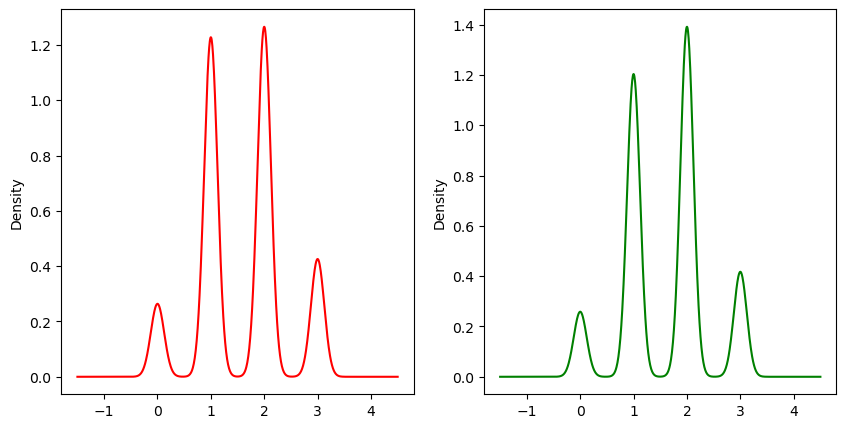

In [29]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
data['balcony'].plot.density(color='r',ax=ax[0])
data1['balcony'].plot.density(color='g',ax=ax[1])

In [30]:
data1['bath'].nunique()

19

In [31]:
data1['bath'].value_counts()

bath
2.0     6546
3.0     3179
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [32]:
data1['bath'].isnull().sum()

57

In [33]:
data1.dropna(subset=['bath'],inplace=True)

In [34]:
def to_sqft(x):
    # Handle ranges (e.g., "4000 - 5249")
    if '-' in x:
        token = x.split('-')
        if len(token) == 2:
            return (float(token[0].strip()) + float(token[1].strip())) / 2

    # Handle Sq. Yards to Sq. Feet
    if "Sq. Yards" in x:
        return float(x.split("Sq. Yards")[0].strip()) * 9

    # Handle Sq. Meter to Sq. Feet
    if "Sq. Meter" in x:
        return float(x.split("Sq. Meter")[0].strip()) * 10.7639

    # Handle Perch to Sq. Feet
    if "Perch" in x:
        return float(x.split("Perch")[0].strip()) * 272.25

    # Handle Grounds to Sq. Feet
    if "Grounds" in x:
        return float(x.split("Grounds")[0].strip()) * 2400

    # Handle Acres to Sq. Feet
    if "Acres" in x:
        return float(x.split("Acres")[0].strip()) * 43560

    # Handle Cents to Sq. Feet
    if "Cents" in x:
        return float(x.split("Cents")[0].strip()) * 435.6

    # Handle Guntha to Sq. Feet
    if "Guntha" in x:
        return float(x.split("Guntha")[0].strip()) * 1089

    # Handle standalone numeric values
    try:
        return float(x)
    except ValueError:
        return None  # For invalid or unknown formats

In [35]:
data1['total_sqft']=data1['total_sqft'].apply(to_sqft)

In [36]:
data1.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [37]:
data1.drop(columns=['area_type'],axis=1,inplace=True)

In [38]:

data1.head()

,availability,location,society,total_sqft,bath,balcony,price,BHK
0,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [39]:
unique_loc=data1['location'].unique()#checkking the unique values of colum location 
len(unique_loc)

1304

In [40]:
data1['location']=data1['location'].str.lower()#converting all the values of column location to lowercase 

In [41]:
data1.head()

,availability,location,society,total_sqft,bath,balcony,price,BHK
0,19-Dec,electronic city phase ii,Coomee,1056.0,2.0,1.0,39.07,2
1,Ready To Move,chikka tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Ready To Move,uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Ready To Move,lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Ready To Move,kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [42]:
len(data1['location'].unique()) #the difference before converting to lower case and after converting 1304-1294

1294

In [43]:
#removing the white spaces between the words in a value
data1['location']=data1['location'].apply(lambda x:x.strip())

In [44]:
data1.head()

,availability,location,society,total_sqft,bath,balcony,price,BHK
0,19-Dec,electronic city phase ii,Coomee,1056.0,2.0,1.0,39.07,2
1,Ready To Move,chikka tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4
2,Ready To Move,uttarahalli,NaN,1440.0,2.0,3.0,62.00,3
3,Ready To Move,lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3
4,Ready To Move,kothanur,NaN,1200.0,2.0,1.0,51.00,2


In [45]:
value_loc=data1['location'].value_counts()

In [46]:
value_loc

location
whitefield           518
sarjapur  road       372
electronic city      289
kanakpura road       242
thanisandra          231
                    ... 
subbannaiah palya      1
whitefiled             1
medi agrahara          1
sadduguntepalya        1
abshot layout          1
Name: count, Length: 1282, dtype: int64

In [47]:
#in order to reduce the dimention i grouped the cities with occurance <=10 to one value 
cities_less_10=value_loc[value_loc<=10]

In [48]:
cities_less_10

location
dairy circle             10
vasanthapura             10
sadashiva nagar          10
nagadevanahalli          10
1st block koramangala    10
                         ..
subbannaiah palya         1
whitefiled                1
medi agrahara             1
sadduguntepalya           1
abshot layout             1
Name: count, Length: 1049, dtype: int64

In [49]:
data1.shape[0]

12717

In [50]:
data1['location']=data1['location'].apply(lambda x: 'other' if x in cities_less_10 else x)

In [51]:
data1['location'].nunique()

234

In [52]:
data1['location'].value_counts()

location
other               2929
whitefield           518
sarjapur  road       372
electronic city      289
kanakpura road       242
                    ... 
lb shastri nagar      11
thyagaraja nagar      11
tindlu                11
hal 2nd stage         11
banjara layout        11
Name: count, Length: 234, dtype: int64

In [53]:
#The price is in terms of lakhs to caluclate the amount per sqr feet 
data1['price_per_sqft']=((data1['price']*100000)/(data1['total_sqft'])).astype(int)

data1.head()

,availability,location,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,19-Dec,electronic city phase ii,Coomee,1056.0,2.0,1.0,39.07,2,3699
1,Ready To Move,chikka tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615
2,Ready To Move,uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,4305
3,Ready To Move,lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245
4,Ready To Move,kothanur,NaN,1200.0,2.0,1.0,51.00,2,4250


In [54]:
data1.head()

,availability,location,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,19-Dec,electronic city phase ii,Coomee,1056.0,2.0,1.0,39.07,2,3699
1,Ready To Move,chikka tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615
2,Ready To Move,uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,4305
3,Ready To Move,lingadheeranahalli,Soiewre,1521.0,3.0,1.0,95.00,3,6245
4,Ready To Move,kothanur,NaN,1200.0,2.0,1.0,51.00,2,4250


In [55]:
data1.sample(5)

,availability,location,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
464,Ready To Move,chikkalasandra,NaN,1100.0,2.0,2.0,50.0,2,4545
1630,Ready To Move,kasavanhalli,NaN,1550.0,2.0,3.0,52.0,3,3354
5670,Ready To Move,other,NaN,2230.0,4.0,1.0,130.0,4,5829
12307,Ready To Move,other,NaN,2000.0,3.0,1.0,180.0,4,9000
5432,18-Mar,bellandur,NiCodCa,1685.0,3.0,3.0,100.0,3,5934


In [56]:

def Outlier_price(data,column):
    sorted_data=data.sort_values(by=column)
    Q1=sorted_data[column].quantile(0.25)
    Q3=sorted_data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    data_no_out=sorted_data[(sorted_data[column]>lower_limit)&(sorted_data[column]<upper_limit)]
    return data_no_out

In [57]:
data2=Outlier_price(data1,'price_per_sqft')

In [58]:
data2.shape

(11513, 9)

<h3>Before removing the outliers in column price_per_sqft</h3>

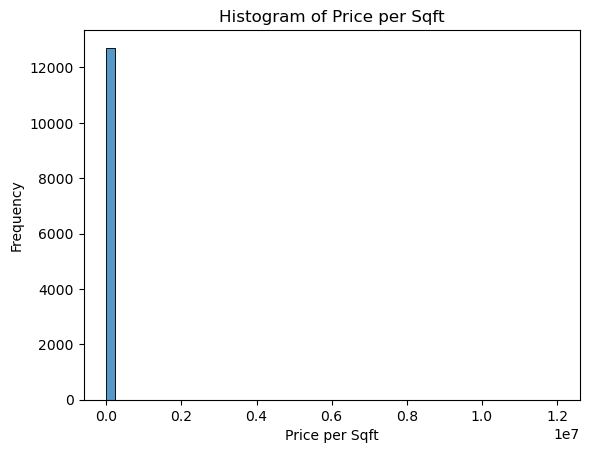

In [59]:
    sns.histplot(data1['price_per_sqft'], bins=50, edgecolor='k')
    plt.xlabel('Price per Sqft')
    plt.ylabel('Frequency')
    plt.title('Histogram of Price per Sqft' )
    plt.show()

<Axes: ylabel='Density'>

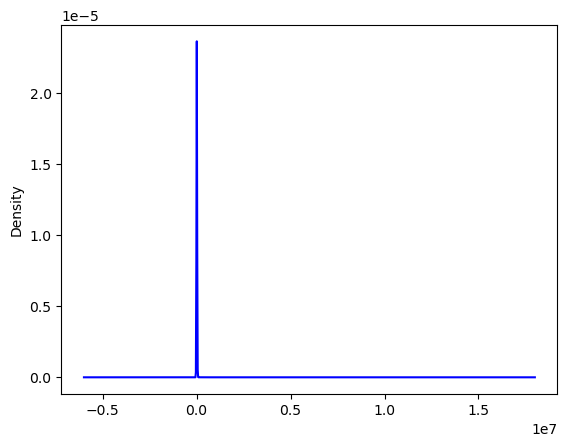

In [60]:
data1['price_per_sqft'].plot.density(color='b')

In [61]:
data1.shape[0]-data2.shape[0]

1204

<h3>After removing the outliers in column price_per_sqft</h3>

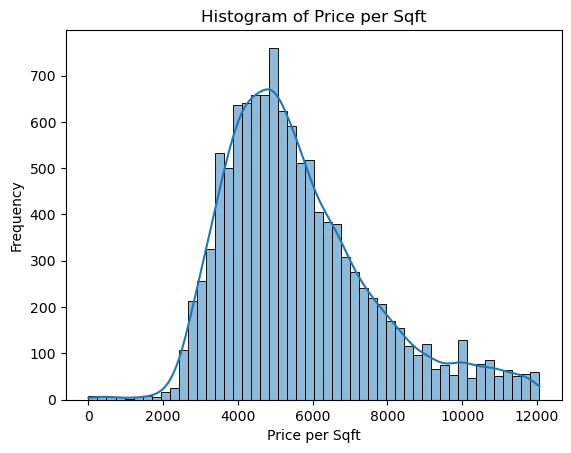

In [62]:
    sns.histplot(data2['price_per_sqft'], bins=50, edgecolor='k',kde=True)
    plt.xlabel('Price per Sqft')
    plt.ylabel('Frequency')
    plt.title('Histogram of Price per Sqft' )
    plt.show()

In [63]:
data2['BHK'].value_counts()

BHK
2     5159
3     4322
4      982
1      593
5      208
6      118
7       49
8       44
9       26
10       6
11       2
27       1
13       1
16       1
14       1
Name: count, dtype: int64

In [64]:
data2[(data2['total_sqft']/data2['BHK'])<350]

,availability,location,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
8653,Ready To Move,doddaballapur,NaN,640.0,1.0,0.0,10.5,2,1640
11173,Ready To Move,other,Jahipa,675.0,2.0,2.0,13.5,2,2000
2796,Ready To Move,electronic city,Itelaa,880.0,2.0,1.0,18.0,3,2045
7028,Ready To Move,other,Jahipa,675.0,1.0,1.0,15.0,2,2222
4786,Ready To Move,electronic city,Itelaa,660.0,1.0,1.0,15.0,2,2272
...,...,...,...,...,...,...,...,...,...
12889,Ready To Move,other,NaN,600.0,3.0,2.0,72.0,2,12000
1735,Ready To Move,other,NaN,750.0,10.0,2.0,90.0,10,12000
857,Ready To Move,vijayanagar,NaN,600.0,4.0,1.0,72.0,8,12000
7087,Ready To Move,vishwapriya layout,NaN,690.0,4.0,1.0,83.0,5,12028


In [65]:
data2=data2[(data2['total_sqft']/data2['BHK'])>=350]

In [66]:
data2.shape

(10942, 9)

<h2>Correlation </h2>

In [67]:
corre_matrix=data2.corr(numeric_only=True)
corre_matrix

,total_sqft,bath,balcony,price,BHK,price_per_sqft
total_sqft,1.000000,0.075884,0.006971,0.066024,0.085194,-0.053167
bath,0.075884,1.000000,0.235265,0.627195,0.870158,0.291686
balcony,0.006971,0.235265,1.000000,0.163701,0.257339,0.057782
price,0.066024,0.627195,0.163701,1.000000,0.566584,0.641315
BHK,0.085194,0.870158,0.257339,0.566584,1.000000,0.222993
price_per_sqft,-0.053167,0.291686,0.057782,0.641315,0.222993,1.000000


Text(0.5, 1.0, 'Correlational Matrix')

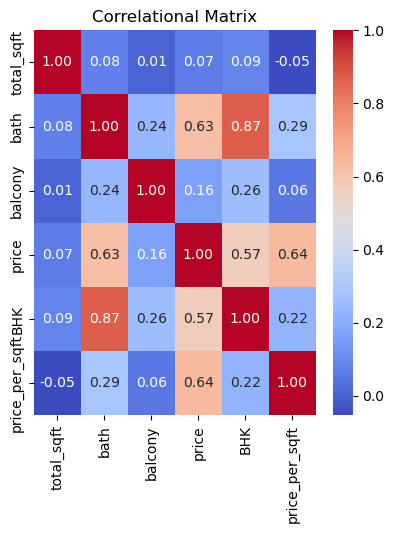

In [68]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlational Matrix')


In [69]:
cov_matrix=data2.cov(numeric_only=True)
cov_matrix

,total_sqft,bath,balcony,price,BHK,price_per_sqft
total_sqft,3.630146e+08,1445.326433,105.428644,97146.676952,1482.203091,-1.922264e+06
bath,1.445326e+03,0.999317,0.186691,48.419252,0.794301,5.533145e+02
balcony,1.054286e+02,0.186691,0.630129,10.035294,0.186533,8.703863e+01
price,9.714668e+04,48.419252,10.035294,5963.869894,39.954317,9.398120e+04
BHK,1.482203e+03,0.794301,0.186533,39.954317,0.833817,3.863945e+02
price_per_sqft,-1.922264e+06,553.314457,87.038635,93981.200286,386.394504,3.600894e+06


In [70]:
data2.drop(columns=['availability','society'],axis=1,inplace=True)

In [71]:
data2.sample(4)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
7276,hebbal,1204.00,2.0,2.0,45.0,2,3737
13156,vittasandra,1648.00,3.0,2.0,85.0,3,5157
5472,electronics city phase 1,1113.12,2.0,2.0,55.0,2,4941
11261,sarjapur road,1113.00,2.0,1.0,44.5,2,3998


C:\Users\raghu\AppData\Local\Temp\ipykernel_11008\130813901.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num.loc[:,col],kde=True)
C:\Users\raghu\AppData\Local\Temp\ipykernel_11008\130813901.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num.loc[:,col],kde=True)
C:\Users\raghu\AppData

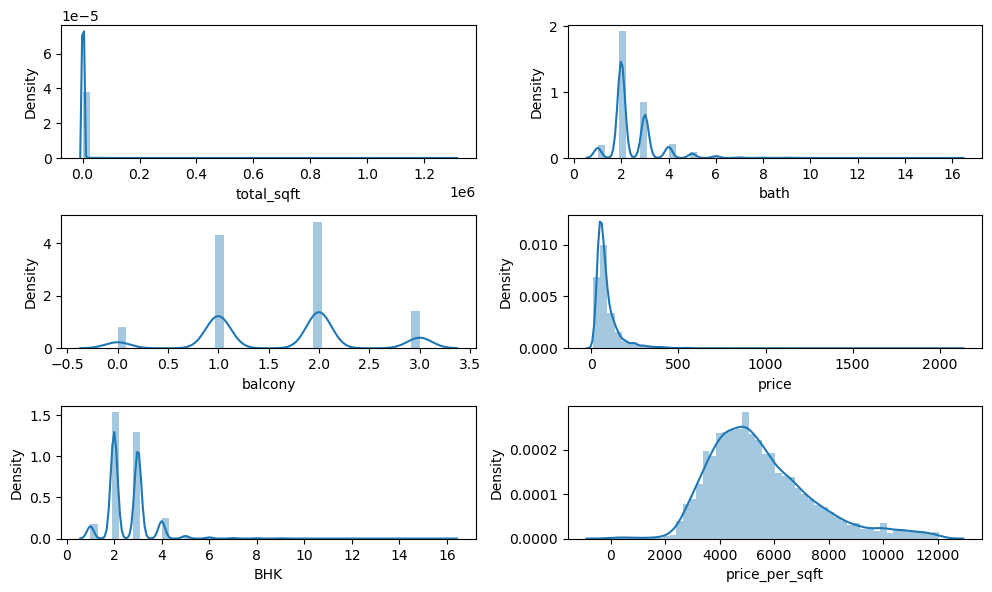

In [72]:
num=data2.select_dtypes(exclude='object')
fig=plt.figure(figsize=(10,6))
for index,col in enumerate(num):
    plt.subplot(3,2,index+1)
    sns.distplot(num.loc[:,col],kde=True)
fig.tight_layout(pad=1.0)

<Axes: xlabel='BHK', ylabel='price'>

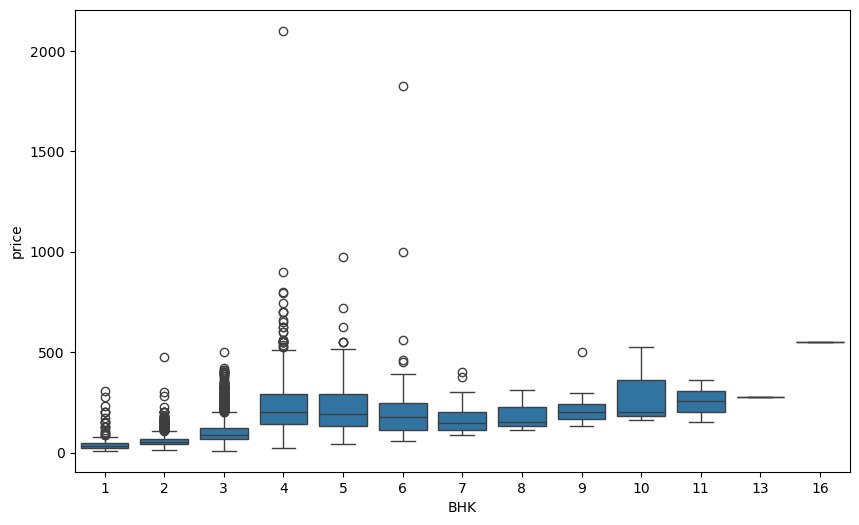

In [73]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(x='BHK',y='price',data=data2)

In [74]:
data2.shape[0]

10942

In [75]:
data2=data2[data2.bath<data2.BHK+3]
data2.shape[0]

10938

In [76]:
data2.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
dtype: int64

<h2>Handling the outliers in the column BHK</h2>

In [77]:
def Scatter_BHK(df,location):
    df_bhk2=df[(df.location==location)&(df.BHK==2)]
    df_bhk3=df[(df.location==location)&(df.BHK==3)]
    fig=plt.figure(figsize=(8,3))
    plt.scatter(df_bhk2.total_sqft,df_bhk2.price,color='y',s=50,label='2 BHK')
    plt.scatter(df_bhk3.total_sqft,df_bhk3.price,marker='X',color='g',s=50,label='3 BHK')
    plt.xlabel('Total square foot ')
    plt.ylabel('Price(in lakhs(ind rupees))')
    plt.title(location)
    plt.legend()
    plt.show()
    

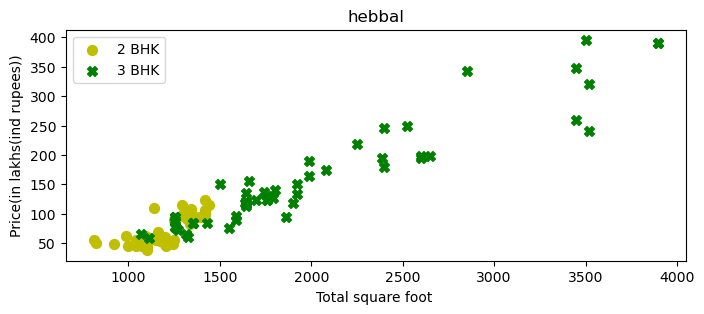

In [78]:
Scatter_BHK(data2,'hebbal')

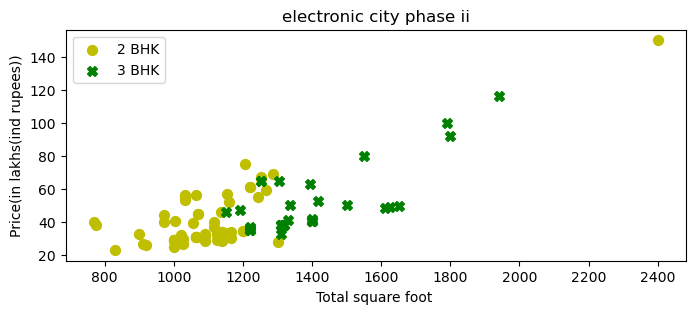

In [79]:
Scatter_BHK(data2,'electronic city phase ii')

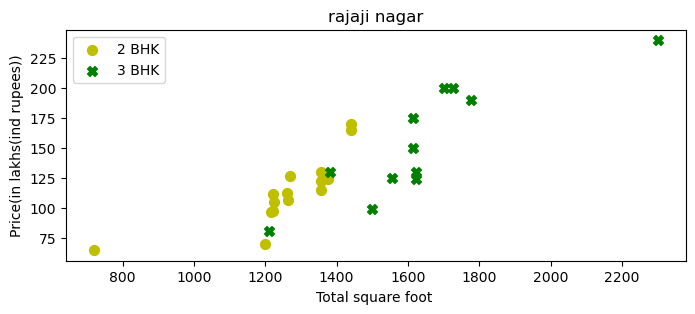

In [80]:
Scatter_BHK(data2,'rajaji nagar')

In [81]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [82]:
data3=remove_bhk_outliers(data2)
print('before:',data2.shape[0])
print('after:',data3.shape[0])

before: 10938
after: 7897


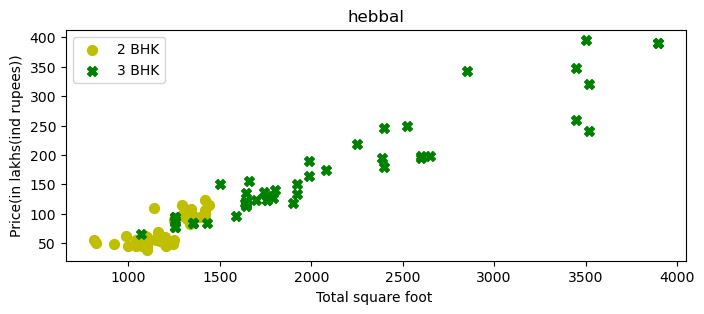

In [83]:
Scatter_BHK(data3,'hebbal')

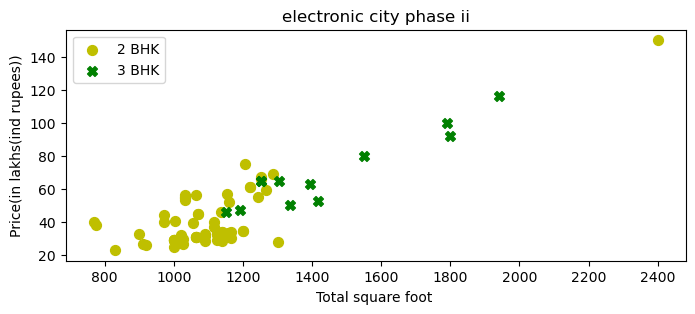

In [84]:
Scatter_BHK(data3,'electronic city phase ii')

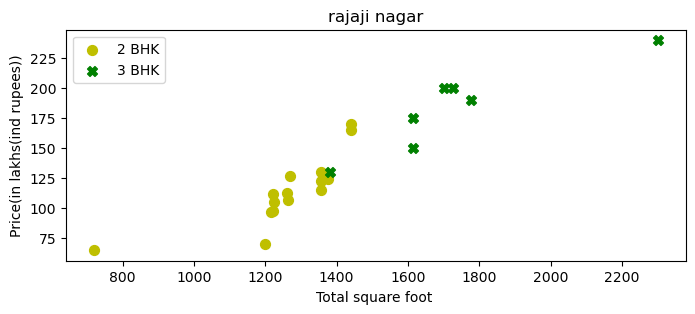

In [85]:
Scatter_BHK(data3,'rajaji nagar')

In [86]:
data4 = pd.get_dummies(data3, columns=['location'], drop_first=True)
data4.columns=data4.columns.str.replace('location_','')


In [87]:
data4.isnull().sum()

total_sqft            0
bath                  0
balcony               0
price                 0
BHK                   0
                     ..
yelachenahalli        0
yelahanka             0
yelahanka new town    0
yelenahalli           0
yeshwanthpur          0
Length: 238, dtype: int64

In [88]:
data4.drop(columns=['price_per_sqft'],inplace=True,axis=1)

In [89]:
data4 = data4[data4.bath<data4.BHK+2]

In [90]:
data4.head()

,total_sqft,bath,balcony,price,BHK,1st phase jp nagar,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,aecs layout,akshaya nagar,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,anjanapura,ardendale,arekere,attibele,babusapalaya,balagere,banashankari,banashankari stage ii,banashankari stage iii,banashankari stage v,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,bommenahalli,brookefield,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,channasandra,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cv raman nagar,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,domlur,dommasandra,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,garudachar palya,giri nagar,gm palaya,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,hal 2nd stage,haralur road,harlur,hbr layout,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,jakkur,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalyan nagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,kr puram,kudlu,kudlu gate,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,mico layout,munnekollal,murugeshpalya,mysore road,nagarbhavi,nagasandra,nagavara,nagavarapalya,neeladri nagar,nehru nagar,ngr layout,nri layout,old airport road,old madras road,ombr layout,other,padmanabhanagar,pai layout,panathur,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 2 hsr layout,sector 7 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
648,1123031.25,9.0,2.0,265.0,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [91]:
data4.to_csv('pre_processed_Bengaluru.csv',index=False)

In [92]:
X=data4.drop(columns=['price'],axis=1)
y=data4['price']

In [93]:
X.head()

,total_sqft,bath,balcony,BHK,1st phase jp nagar,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,aecs layout,akshaya nagar,ambalipura,ambedkar nagar,amruthahalli,anandapura,ananth nagar,anekal,anjanapura,ardendale,arekere,attibele,babusapalaya,balagere,banashankari,banashankari stage ii,banashankari stage iii,banashankari stage v,banashankari stage vi,banaswadi,banjara layout,bannerghatta,bannerghatta road,basavangudi,basaveshwara nagar,battarahalli,begur,begur road,bellandur,benson town,bharathi nagar,bhoganhalli,billekahalli,binny pete,bisuvanahalli,bommanahalli,bommasandra,bommasandra industrial area,bommenahalli,brookefield,btm 2nd stage,btm layout,budigere,chamrajpet,chandapura,channasandra,chikka tirupathi,chikkabanavar,chikkalasandra,choodasandra,cooke town,cox town,cv raman nagar,dasanapura,dasarahalli,devanahalli,devarachikkanahalli,dodda nekkundi,doddaballapur,doddakallasandra,doddathoguru,domlur,dommasandra,electronic city,electronic city phase ii,electronics city phase 1,epip zone,frazer town,garudachar palya,giri nagar,gm palaya,gollarapalya hosahalli,gottigere,green glen layout,gubbalala,gunjur,hal 2nd stage,haralur road,harlur,hbr layout,hebbal,hebbal kempapura,hegde nagar,hennur,hennur road,hoodi,horamavu agara,horamavu banaswadi,hormavu,hosa road,hosakerehalli,hoskote,hosur road,hrbr layout,hsr layout,hulimavu,iblur village,indira nagar,isro layout,itpl,jakkur,jalahalli,jalahalli east,jigani,jp nagar,judicial layout,kadubeesanahalli,kadugodi,kaggadasapura,kaggalipura,kaikondrahalli,kalena agrahara,kalyan nagar,kambipura,kammanahalli,kammasandra,kanakapura,kanakpura road,kannamangala,karuna nagar,kasavanhalli,kasturi nagar,kathriguppe,kaval byrasandra,kenchenahalli,kengeri,kengeri satellite town,kereguddadahalli,kodichikkanahalli,kodigehaali,kodigehalli,kodihalli,kogilu,konanakunte,koramangala,kothannur,kothanur,kr puram,kudlu,kudlu gate,kumaraswami layout,kundalahalli,laggere,lakshminarayana pura,lb shastri nagar,lingadheeranahalli,magadi road,mahadevpura,mahalakshmi layout,mallasandra,malleshpalya,malleshwaram,marathahalli,margondanahalli,mico layout,munnekollal,murugeshpalya,mysore road,nagarbhavi,nagasandra,nagavara,nagavarapalya,neeladri nagar,nehru nagar,ngr layout,nri layout,old airport road,old madras road,ombr layout,other,padmanabhanagar,pai layout,panathur,poorna pragna layout,prithvi layout,r.t. nagar,rachenahalli,raja rajeshwari nagar,rajaji nagar,rajiv nagar,ramagondanahalli,ramamurthy nagar,rayasandra,sahakara nagar,sanjay nagar,sarakki nagar,sarjapur,sarjapur road,sarjapura - attibele road,sector 2 hsr layout,sector 7 hsr layout,seegehalli,shampura,shivaji nagar,singasandra,somasundara palya,sompura,sonnenahalli,subramanyapura,sultan palaya,talaghattapura,tc palaya,thanisandra,thigalarapalya,thubarahalli,thyagaraja nagar,tindlu,tumkur road,ulsoor,uttarahalli,varthur,varthur road,vidyaranyapura,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
648,1123031.25,9.0,2.0,9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [94]:
y.head()

648     265.0
7607    217.0
7001    290.0
1019    110.0
7334    125.0
Name: price, dtype: float64

In [95]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X1 = sc.fit_transform(X)

In [96]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [99]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(),
    XGBRegressor(objective='reg:squarederror'),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

In [100]:
model_names = []
mae_Accuracy=[]
mse_Accuracy=[]
r2_Accuracy=[]

for algo in models:
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    model_names.append(algo.__class__.__name__)
    mae_Accuracy.append(mae)
    mse_Accuracy.append(mse)
    r2_Accuracy.append(r2)

In [101]:
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'mse_Accuracy': mse_Accuracy,
    'r2_Accuracy': r2_Accuracy,
        })
model_df.sort_values(by='r2_Accuracy',ascending=False)

,Model,mae_Accuracy,mse_Accuracy,r2_Accuracy
4,XGBRegressor,15.999541,776.660497,0.877286
6,GradientBoostingRegressor,17.759594,914.750672,0.855467
5,RandomForestRegressor,16.391250,1003.201487,0.841492
3,DecisionTreeRegressor,19.398975,1898.721527,0.699998
1,Ridge,28.464256,3270.225292,0.483297
0,LinearRegression,28.615046,3283.478139,0.481203
2,Lasso,31.476189,3585.060676,0.433552
